In [1]:
from AnastrisTNG import TNGsimulation, TNGtools, Anatools  
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
run = 'TNG50-1'
BasePath = '/home/yxi/Simulation/sims/' + run + '/output/'        
snap=99                                                             

In [3]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)       
Snapshot.load_particle_para['star_fields'] = ['GFM_StellarFormationTime','GFM_Metallicity','GFM_StellarPhotometrics']
Snapshot.load_particle_para['gas_fields'] = ['GFM_Metallicity'] 

In [4]:
sub12 = Snapshot.load_particle(8) #载入ID8 的subhalo

In [5]:
sub12.physical_units()   #单位物理化

In [6]:
sub12.face_on(alignwith='star',rmax=10)  #中心10kpc内的 恒星角动量 进行face on, 返回值为 中心坐标，中心速度，转动矩阵

[SimArray([11914.12966315, 36004.40193118, 30827.15043217], 'kpc'),
 SimArray([-915.42742908,  446.77378429,  276.41647178], 'km s**-1'),
 array([[-0.65769867,  0.        ,  0.75328113],
        [ 0.39673848,  0.85006332,  0.34639706],
        [-0.64033666,  0.5266805 , -0.55908552]])]

In [7]:
sub12.face_on(alignwith='star',rmax=10, alignmode='moi')  #中心10kpc内的 恒星质量矩 进行face on
sub12.face_on(alignwith='star',rmax=10, alignmode='krot')  #中心10kpc内的 恒星krot最大值方向 进行face on

# alignwith  可以使用 'all' 所有物质   ; 'star' 恒星粒子；  'gas' 气体粒子； 'baryon' 重子物质；   'dm' 暗物质 
# retmatrix, default =False, 如果为True，则返回转动矩阵
# 可以使用rmax，zmax，Rmax 等 来限制选择粒子的范围。也可以传入 sele = (bool) 的元组，自定义粒子的选取。
#   rmax 默认为 None，即不对范围进行限制

[SimArray([-1.58926038e-05, -6.37037186e-05, -1.84005673e-05], 'kpc'),
 SimArray([-0.00049228,  0.00113519,  0.00039015], 'km s**-1'),
 array([[ 0.98404614, -0.        ,  0.17791345],
        [-0.00673875,  0.99928243,  0.03727229],
        [-0.17778578, -0.03787657,  0.98334001]])]

In [8]:
sub12.center()    #中心坐标 mode 默认为 'ssc'

SimArray([ 9.61430244e-05,  1.34426864e-04, -2.78431269e-05], 'kpc')

In [9]:
sub12.vel_center()  #中心速度 

SimArray([-0.00132779, -0.00091683,  0.00061947], 'km s**-1')

In [10]:
sub12.face_on(mode='hyb',alignwith='star',rmax=8)  #利用'hyb 模式计算中心坐标，移到中心后，再以 8kpc内恒星 计算角动量方向
# 涉及到 计算引力势，

There is no phi in the keyword
Calculating gravity and it will take tens of seconds
Calculate by using Octree


[SimArray([ 0.00021386,  0.00062473, -0.00052992], 'kpc'),
 SimArray([-0.00591359,  0.00223139, -0.00381246], 'km s**-1'),
 array([[ 9.99994556e-01, -0.00000000e+00,  3.29973638e-03],
        [-8.82135160e-06,  9.99996427e-01,  2.67333586e-03],
        [-3.29972459e-03, -2.67335041e-03,  9.99990982e-01]])]

In [13]:
sub12['phi']   #引力势

SimArray([-143543.39276709, -139750.63884369, -142743.9275582 , ...,
           -54147.90577059,  -57260.0472045 , -142562.11934337], 'km**2 s**-2')

In [11]:
print(sub12.center(mode='ssc'),) 
print(sub12.center(mode='pot'),) #势能最低点
print(sub12.center(mode='com'),) #质心
print(sub12.center('hyb'))
#几种不同方法计算的中心位置 

[-0.00011606 -0.00048896  0.00050377]
[ 0.01802347  0.00889004 -0.02491917]
[-1.05826698  2.57614823 -2.51837636]
[ 1.60220007e-10  1.11759415e-10 -4.14755398e-10]


In [12]:
sub12.face_on(mode='hyb',alignwith='baryon',rmax=8)   

[SimArray([-3.30936754e-12,  4.47906491e-12,  3.85242185e-12], 'kpc'),
 SimArray([ 5.29959158e-15, -8.66939047e-15,  3.21240111e-15], 'km s**-1'),
 array([[ 9.99998106e-01,  0.00000000e+00, -1.94641262e-03],
        [-1.58203486e-06,  9.99999670e-01, -8.12793674e-04],
        [ 1.94641198e-03,  8.12795214e-04,  9.99997775e-01]])]

In [13]:
# 使用 pynbody 的 SPH 方法 画图

In [14]:
from pynbody import plot

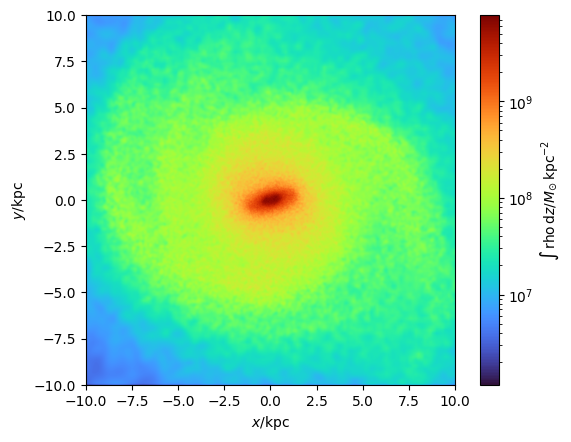

In [15]:
plot.image(sub12.s,units="Msol kpc**-2",width = "20 kpc",cmap='turbo')      # 可以使用 pynbody 的内置的SPH 方法绘图

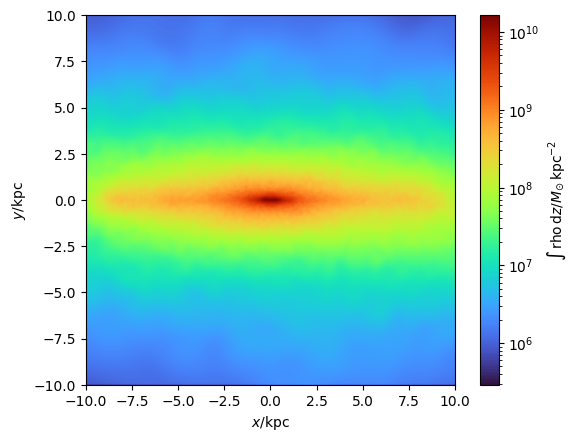

In [16]:
plot.sideon_image(sub12.s,units="Msol kpc**-2",width = "20 kpc",cmap='turbo')

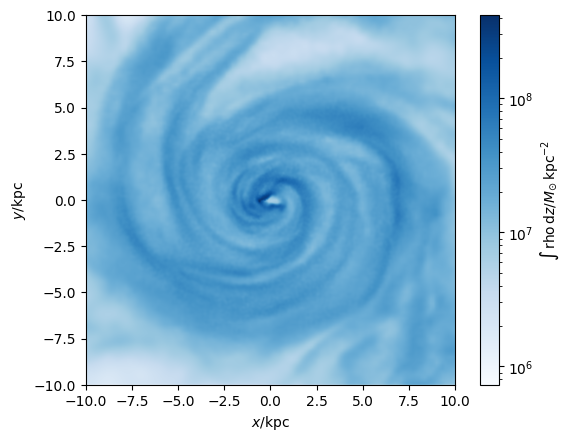

In [17]:
plot.image(sub12.g,units="Msol kpc**-2",width = "20 kpc",cmap='Blues') 

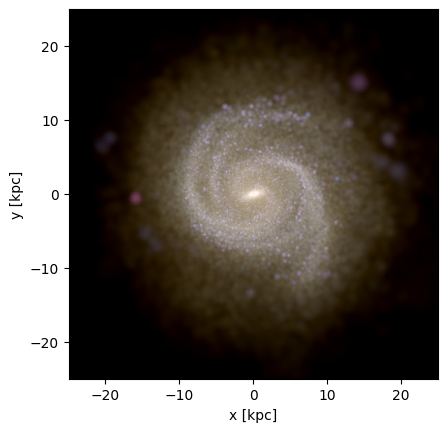

In [18]:
plot.stars.render(sub12.s,g_scale=0.6, r_scale=0.7,b_scale=0.6,dynamic_range=4,)